In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mmsbm.mmsbm import MMSBM

In [5]:
# Constants
sampling = 2
# Number of groups of users
k = 3
# Number of groups of items
l = 3
# Iterations
# To plateau the coefficients the minimum is 500
iterations = 10
df = pd.read_csv("data/train_5.csv")
test = pd.read_csv("data/test_5.csv")

In [6]:
mmsbm = MMSBM(
    user_groups=k,
    item_groups=l,
    iterations=iterations,
    sampling=sampling,
    seed=12,
)
mmsbm.cv_fit(df, 5)
prediction_matrix = mmsbm.predict(test)
results = mmsbm.score()

INFO:MMSBM:Running fold 1 of 5...
INFO:MMSBM:Running fold 2 of 5...
INFO:MMSBM:Running fold 3 of 5...
INFO:MMSBM:Running fold 4 of 5...
INFO:MMSBM:Running fold 5 of 5...
INFO:MMSBM:Ran 5 folds with accuracies [0.3157512953367876, 0.2973673300165838, 0.3018457071754459, 0.3031876232997612, 0.3112410656270305].
INFO:MMSBM:They have mean 0.3058786042911218 and sd 0.006665935008386885.
INFO:MMSBM:The final accuracy is 0.3010774968918359, the one off accuracy is 0.6166597596353087 and the MAE is 0.7362204724409449.


In [6]:
sizes = df.groupby(df.columns[0]).size()

In [10]:
sizes[sizes < 2].index.values

array([6465], dtype=int64)

<AxesSubplot:>

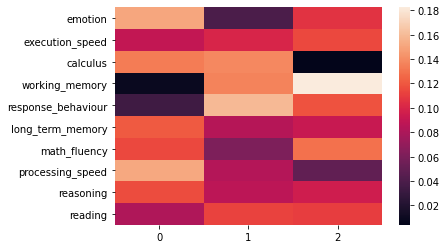

In [5]:
eta = results["objects"]["eta"]
# Groups of tests
neta = eta.div(eta.sum(axis=0))
sns.heatmap(neta)

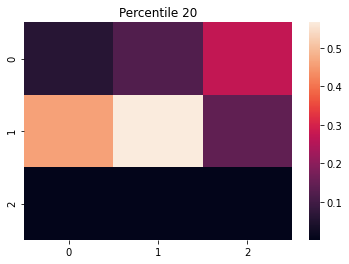

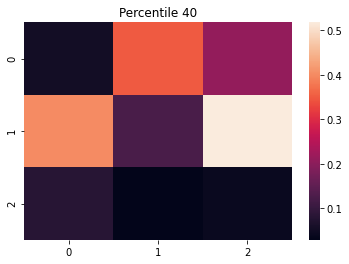

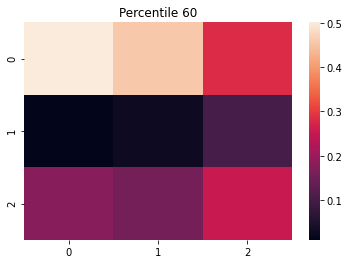

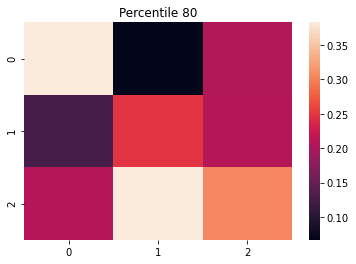

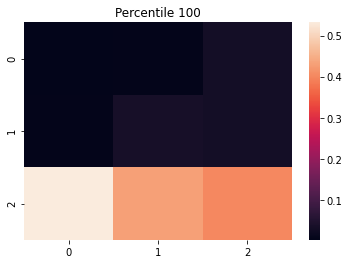

In [11]:
pr = results["objects"]["pr"]
# Probability distributions
for i, prs in pr.items():
    ax = plt.axes()
    sns.heatmap(prs, ax = ax)

    ax.set_title(f"Percentile {int(i) * 20}")
    plt.show()

<AxesSubplot:>

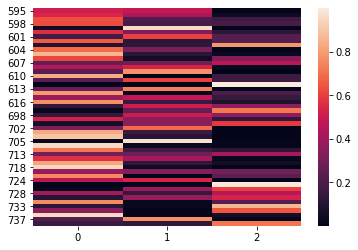

In [12]:
# Observations belonging to groups
sns.heatmap(results["objects"]["theta"].iloc[:50, :])

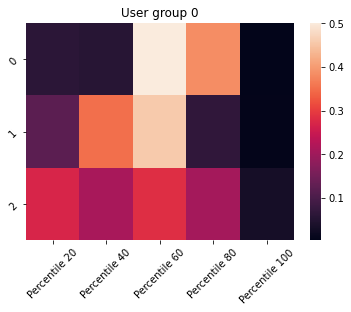

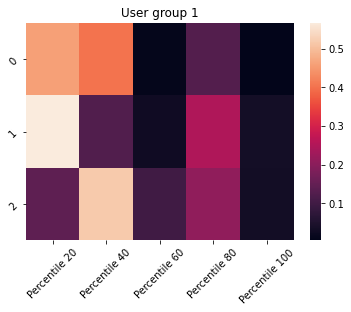

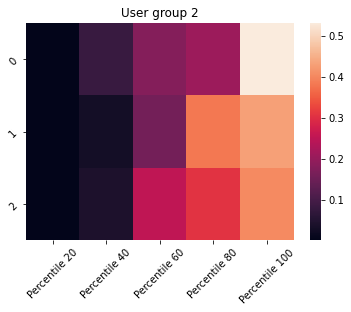

In [13]:
# Let's try to understand the groups better
df = pd.concat(pr, axis=0).swaplevel()

for i in set(df.index.get_level_values(0)):
    temp = df[df.index.isin([int(i)], level=0)].droplevel(0).transpose()
    ax = plt.axes()
    sns.heatmap(temp, ax = ax)
    ax.set_xticklabels([f"Percentile {int(a) * 20}" for a in pr.keys()])
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    ax.set_title(f"User group {i}")
    plt.show()

In [3]:
from random import choice

df = pd.DataFrame(
    {
    "users": [f"user{choice(list(range(5)))}" for _ in range(100)],
    "items": [f"item{choice(list(range(5)))}" for _ in range(100)],
    "ratings": [choice(list(range(1, 6))) for _ in range(100)]
    }
)

In [4]:
df

users  items  ratings
0   user4  item1        2
1   user4  item3        1
2   user2  item3        4
3   user2  item4        4
4   user0  item4        4
..    ...    ...      ...
95  user1  item2        1
96  user2  item0        4
97  user0  item0        4
98  user0  item2        4
99  user0  item1        4

[100 rows x 3 columns]